In [64]:
import pandas as pd
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
%matplotlib inline
ml.style.use('ggplot')

In [2]:
suicide = pd.read_csv("master.csv")
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
suicide.shape

(27820, 12)

In [5]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
suicide[suicide['HDI for year'].isnull()]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27755,Uzbekistan,2009,female,75+ years,7,318983,2.19,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent
27756,Uzbekistan,2009,female,35-54 years,65,3263931,1.99,Uzbekistan2009,NaN,"33,689,223,673",1332,Boomers
27757,Uzbekistan,2009,female,55-74 years,15,1105076,1.36,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent
27758,Uzbekistan,2009,male,5-14 years,37,2805898,1.32,Uzbekistan2009,NaN,"33,689,223,673",1332,Generation Z


In [7]:
suicide[suicide['HDI for year'].isnull()]['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2001,
       2002, 2003, 2004, 2006, 2007, 2008, 2009, 1985, 1986, 1990, 1991,
       1995, 2000, 2005, 2015, 2016, 2010, 2011, 2012, 2013, 2014],
      dtype=int64)

In [8]:
# HDI(Human Development Index) won't help us too much. So dropping it.
suicide.drop('HDI for year',axis=1,inplace=True)

In [9]:
suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z


# Analysis of the dataset

## 1. Suicide prone country

In [126]:
con = suicide.groupby('country',as_index=False)['suicides_no'].sum()
con

,country,suicides_no
0,Albania,1970
1,Antigua and Barbuda,11
2,Argentina,82219
3,Armenia,1905
4,Aruba,101
...,...,...
96,United Arab Emirates,622
97,United Kingdom,136805
98,United States,1034013
99,Uruguay,13138


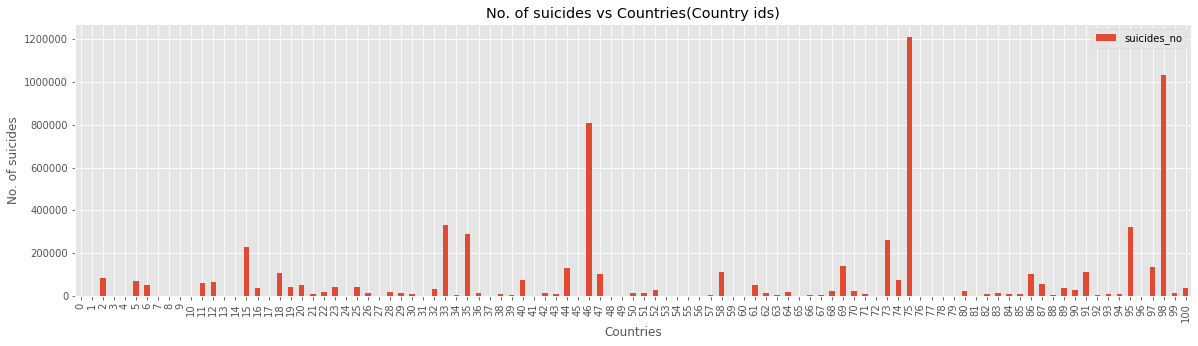

In [127]:
suicide.groupby('country',as_index=False)['suicides_no'].sum().plot(kind='bar', figsize=(20,5))
plt.xlabel('Countries')
plt.ylabel('No. of suicides')
plt.title('No. of suicides vs Countries(Country ids)')
plt.show()

In [128]:
con[con['suicides_no']==max(con['suicides_no'].values)]

,country,suicides_no
75,Russian Federation,1209742


The Russian Federation holds the record of the most number of suicides

## 2. Year with most number of suicides

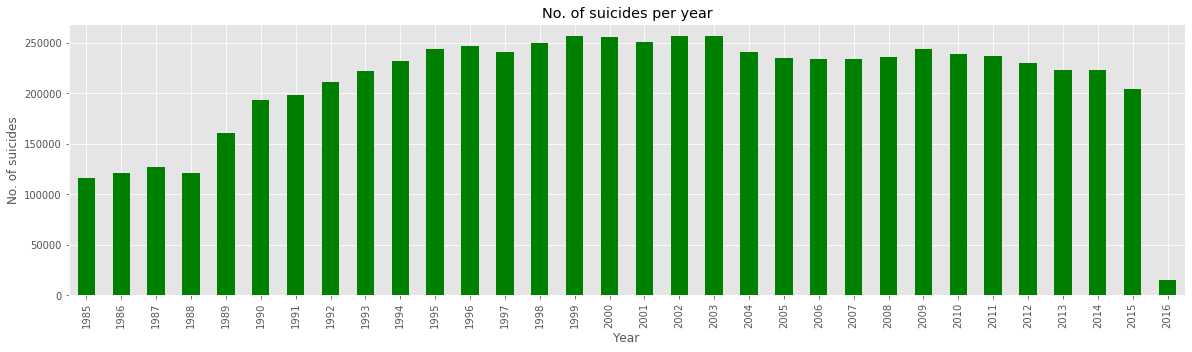

In [58]:
suicide.groupby('year')['suicides_no'].sum().plot(kind='bar',figsize=(20,5),color='Green')
plt.xlabel('Year')
plt.ylabel('No. of suicides')
plt.title('No. of suicides per year')
plt.show()

In [124]:
x = suicide.groupby('year')['suicides_no'].sum().reset_index()
x[x['suicides_no']==max(x['suicides_no'].values)]

,year,suicides_no
14,1999,256119


The year 1999 witnessed the most number of suicides

## 3. Generation with most number of suicides

In [52]:
gen = suicide.groupby('generation')['suicides_no'].sum()
gen

generation
Boomers            2284498
G.I. Generation     510009
Generation X       1532804
Generation Z         15906
Millenials          623459
Silent             1781744
Name: suicides_no, dtype: int64

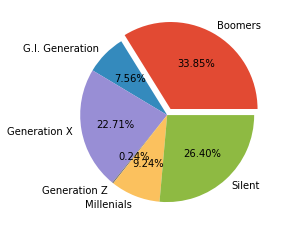

In [57]:
explode = (0.08,0,0,0,0,0)
plt.pie(gen,labels=gen.index,explode=explode,autopct="%0.2f%%")
plt.show()

As is evident from the pie chart, the Boomers are the most suicide prone

## 4. Suicide trend among age groups

In [80]:
suicide.groupby('age')['suicides_no'].sum()

age
15-24 years     808542
25-34 years    1123912
35-54 years    2452141
5-14 years       52264
55-74 years    1658443
75+ years       653118
Name: suicides_no, dtype: int64

Text(0.5, 1.0, 'No. of suicides vs Age groups')

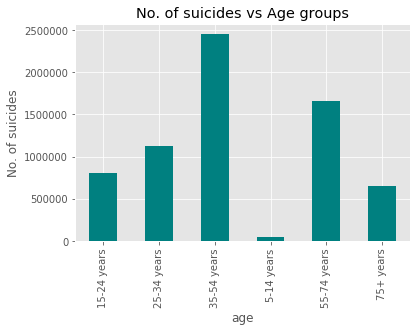

In [81]:
suicide.groupby('age')['suicides_no'].sum().plot(kind='bar',color='Teal')
plt.ylabel('No. of suicides')
plt.title('No. of suicides vs Age groups')

The people in the age group 35-54 years are most likely to commit suicide

## 5. Sex based analysis

In [84]:
suicide['sex'].value_counts()

female    13910
male      13910
Name: sex, dtype: int64

In [60]:
import seaborn as sns

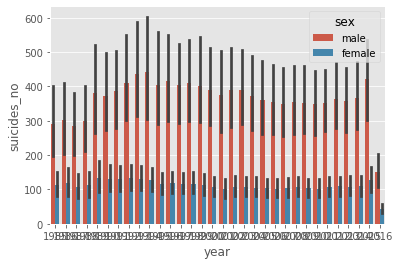

In [87]:
sns.barplot(x='year',y='suicides_no',data=suicide,hue='sex')

Though unclear, but observing the blue bars, we see that females tend to commit suicide lesser than males.

## 6. Relation (correlation) in between the features

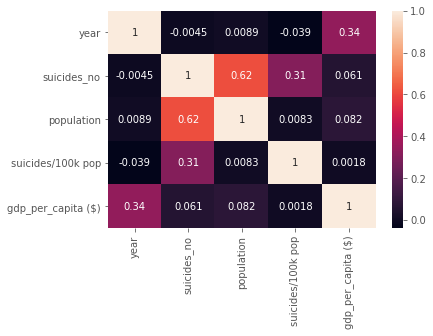

In [90]:
# Relation between the features : How effectively they are correlated to each other ?
sns.heatmap(suicide.corr(),annot=True)

1. Number of suicides is most dependent on population
2. Suicides/100k pop is least dependent on year
3. gdp_per_capita ($) has almost no importance
4. Number of suicides is low-moderately dependent on year

## 7. Number of suicides per year per age-group per sex

In [118]:
# No. of suicides per age group per year per sex
pvt1 = suicide.pivot_table(index='year',columns=['age','sex'],values='suicides_no',aggfunc='sum')
pvt1

age  15-24 years          25-34 years          35-54 years           \
sex       female     male      female     male      female     male   
year                                                                  
1985      4690.0  13180.0      4894.0  15877.0      9476.0  26272.0   
1986      4821.0  13242.0      5058.0  16627.0     10047.0  27511.0   
1987      4046.0  12386.0      4923.0  17386.0     10551.0  30098.0   
1988      3447.0  11890.0      4468.0  16864.0     10014.0  28756.0   
1989      4004.0  14632.0      5422.0  24005.0     12246.0  41295.0   
1990      5308.0  17940.0      6772.0  28504.0     14622.0  50620.0   
1991      5034.0  18283.0      6486.0  29129.0     14824.0  53550.0   
1992      5448.0  19279.0      6830.0  30928.0     15840.0  59211.0   
1993      5181.0  20081.0      6812.0  32232.0     15947.0  64723.0   
1994      5372.0  21924.0      6846.0  34100.0     16238.0  68748.0   
1995      5976.0  23485.0      7117.0  35254.0     17304.0  72448.0   
1996      6243.0  24122.0      7432.0  35161.0     17327.0  73953.0   
1997      6369.0  23788.0      7455.0  33703.0     17223.0  70789.0   
1998      6666.0  24151.0      7439.0  34267.0     17446.0  74181.0   
1999      6518.0  25064.0      7444.0  34524.0     18147.0  78076.0   
2000      6434.0  25308.0      7269.0  34336.0     18203.0  79611.0   
2001      6100.0  24706.0      6738.0  33541.0     17863.0  79135.0   
2002      6227.0  24860.0      7254.0  34282.0     18786.0  79889.0   
2003      6531.0  24027.0      7287.0  33766.0     18676.0  80017.0   
2004      5853.0  22849.0      6833.0  31388.0     18362.0  74169.0   
2005      5869.0  21755.0      6936.0  30506.0     17447.0  71051.0   
2006      5933.0  22004.0      6763.0  30458.0     17642.0  69390.0   
2007      5876.0  21794.0      7254.0  30682.0     17989.0  67760.0   
2008      6163.0  21982.0      7387.0  30369.0     18408.0  68256.0   
2009      6371.0  22116.0      7596.0  31793.0     18751.0  71639.0   
2010      6164.0  21520.0      7363.0  30954.0     18468.0  68896.0   
2011      6468.0  21469.0      7437.0  30499.0     18344.0  67001.0   
2012      5940.0  20340.0      7080.0  29545.0     17986.0  64496.0   
2013      5666.0  18583.0      6719.0  28349.0     17524.0  62703.0   
2014      5452.0  18576.0      6871.0  28510.0     17424.0  61708.0   
2015      5029.0  16812.0      6265.0  25853.0     15876.0  55422.0   
2016       238.0    957.0       373.0   1697.0      1232.0   4534.0   

age  5-14 years         55-74 years          75+ years           
sex      female    male      female     male    female     male  
year                                                             
1985      351.0   633.0      9057.0  19679.0    4011.0   7943.0  
1986      303.0   641.0      9308.0  20452.0    4315.0   8345.0  
1987      271.0   664.0     10373.0  22096.0    4842.0   9206.0  
1988      244.0   593.0      9869.0  20669.0    4973.0   9239.0  
1989      308.0   842.0     12727.0  27360.0    6654.0  10749.0  
1990      384.0  1093.0     14891.0  32127.0    8141.0  12959.0  
1991      379.0  1154.0     14887.0  33428.0    8012.0  12854.0  
1992      455.0  1232.0     15129.0  36377.0    7865.0  12879.0  
1993      479.0  1310.0     15288.0  38990.0    7624.0  12898.0  
1994      475.0  1285.0     15129.0  41447.0    7472.0  13027.0  
1995      538.0  1383.0     15808.0  43330.0    7761.0  13140.0  
1996      538.0  1327.0     15495.0  44484.0    7548.0  13095.0  
1997      578.0  1302.0     14941.0  43731.0    7560.0  13306.0  
1998      662.0  1420.0     15451.0  46191.0    7967.0  13750.0  
1999      596.0  1453.0     15569.0  47095.0    7941.0  13692.0  
2000      580.0  1485.0     15026.0  45947.0    7742.0  13891.0  
2001      649.0  1446.0     14121.0  44916.0    7528.0  13909.0  
2002      677.0  1387.0     14680.0  45644.0    7925.0  14484.0  
2003      600.0  1273.0     14618.0  46311.0    7915.0  15058.0  
2004      607.0  1232.0     13902.0  43201.0    7675.0  14790.

In [99]:
# Verifying
mask1=suicide['year']==1985
mask2=suicide['age']=="15-24 years"

new = suicide[mask1&mask2]
sum(new['suicides_no'].values)      # See first cell of pvt, is same. So, correct.

17870

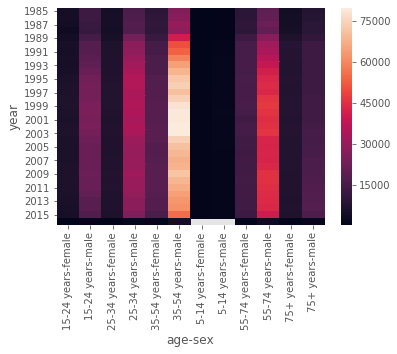

In [119]:
sns.heatmap(pvt1)

## 8. Number of suicides per country per age-group per sex

In [130]:
# Suicides per age group per Country
pvt2 = suicide.pivot_table(index='country',columns=['age','sex'],values='suicides_no',aggfunc='sum')
pvt2

age                  15-24 years           25-34 years           35-54 years  \
sex                       female      male      female      male      female   
country                                                                        
Albania                    253.0     293.0       139.0     288.0       173.0   
Antigua and Barbuda          0.0       0.0         0.0       1.0         0.0   
Argentina                 4021.0   13634.0      2639.0   10851.0      5181.0   
Armenia                     36.0     139.0        54.0     236.0       143.0   
Aruba                        2.0       5.0         2.0      22.0         7.0   
...                          ...       ...         ...       ...         ...   
United Arab Emirates        29.0      75.0        43.0     214.0        19.0   
United Kingdom            2771.0   12154.0      4942.0   21345.0     12052.0   
United States            22903.0  118776.0     33796.0  148251.0     91572.0   
Uruguay                    341.0    1425.0       358.0    1599.0       903.0   
Uzbekistan                3765.0    5908.0      2191.0    6387.0      1797.0   

age                            5-14 years         55-74 years            \
sex                       male     female    male      female      male   
country                                                                   
Albania                  418.0       21.0    40.0        68.0     196.0   
Antigua and Barbuda        6.0        0.0     0.0         1.0       3.0   
Argentina              16600.0      595.0   857.0      4481.0   15381.0   
Armenia                  506.0        7.0    17.0       183.0     391.0   
Aruba                     35.0        0.0     0.0         4.0      18.0   
...                        ...        ...     ...         ...       ...   
United Arab Emirates     216.0        2.0     0.0         5.0      18.0   
United Kingdom         42033.0       92.0   150.0      8847.0   21235.0   
United States         289345.0     2447.0  6476.0     48591.0  176179.0   
Uruguay                 2861.0       42.0    62.0       836.0    2899.0   
Uzbekistan              9167.0      338.0  1038.0       850.0    2745.0   

age                  75+ years           
sex                     female     male  
country                                  
Albania                   39.0     42.0  
Antigua and Barbuda        0.0      0.0  
Argentina               1409.0   6570.0  
Armenia                   72.0    121.0  
Aruba                      2.0      4.0  
...                        ...      ...  
United Arab Emirates       0.0      1.0  
United Kingdom          3983.0   7201.0  
United States          14488.0  81189.0  
Uruguay                  340.0   1472.0  
Uzbekistan               319.0    298.0  

[101 rows x 12 columns]

In [131]:
# Verifying
mask1=suicide['country']=="Albania"
mask2=suicide['age']=="15-24 years"

new1 = suicide[mask1&mask2]
sum(new1['suicides_no'].values)      # See first cell of pvt, is same. So, correct.

546

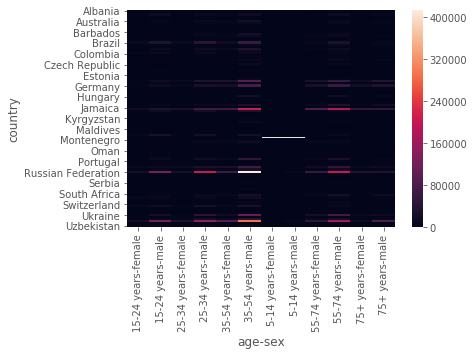

In [132]:
sns.heatmap(pvt2)